# Análisis exploratorio de datos - Covid

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
# Load data
path = '/work/covid-ec/data/processed/'

positives = pd.read_pickle(path + 'positives.pkl')
vaccines = pd.read_pickle(path + 'vaccines.pkl')
deaths = pd.read_pickle(path + 'deaths.pkl')

## Positives

### Visión general

In [4]:
positives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15600 entries, 0 to 8543
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   provincia             15600 non-null  object        
 1   poblacion             15600 non-null  int64         
 2   acumulados_provincia  15600 non-null  int64         
 3   nuevas                15600 non-null  int64         
 4   created_at            15600 non-null  datetime64[ns]
 5   acumulados            15600 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 853.1+ KB


In [5]:
positives.describe()

,poblacion,acumulados_provincia,nuevas,acumulados
count,1.560000e+04,15600.000000,15600.000000,15600.000000
mean,7.278640e+05,11294.688782,35.164038,279183.800385
std,9.998200e+05,24982.889622,108.985251,186536.138544
min,3.304200e+04,0.000000,0.000000,0.000000
25%,1.941185e+05,1648.000000,1.000000,107193.000000
50%,4.824865e+05,4322.000000,8.000000,260145.500000
75%,6.222500e+05,10218.250000,28.000000,478018.500000
max,4.387434e+06,199831.000000,3388.000000,548559.000000


### Análisis unidimensional

¿Cuántos casos positivos hay al día quitando los outliers?

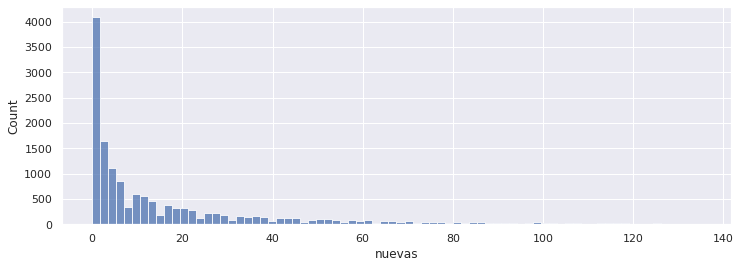

In [6]:
plt.figure(figsize=[12, 4])
data_p = positives[positives['nuevas'] < positives['nuevas'].quantile(0.95)]['nuevas']
sns.histplot(data=data_p)
plt.show()

### Análisis multidimensional

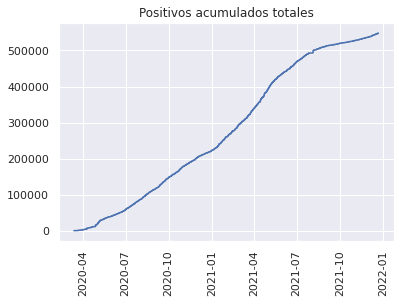

In [7]:
plt.plot(positives.created_at, positives.acumulados)
plt.xticks(rotation=90)
plt.title('Positivos acumulados totales')
plt.show()

## Vaccines

### Visión general

In [8]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fecha          246 non-null    datetime64[ns]
 1   dosis_total    246 non-null    int64         
 2   primera_dosis  246 non-null    int64         
 3   segunda_dosis  246 non-null    int64         
 4   refuerzo       246 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 11.5 KB


In [9]:
vaccines.describe()

,dosis_total,primera_dosis,segunda_dosis,refuerzo
count,2.460000e+02,2.460000e+02,2.460000e+02,246.000000
mean,1.233345e+07,7.012381e+06,5.244127e+06,76895.008130
std,9.787054e+06,5.110084e+06,4.704557e+06,186708.077743
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.906376e+06,1.415516e+06,4.908600e+05,0.000000
50%,1.226136e+07,9.485820e+06,2.775545e+06,0.000000
75%,2.140636e+07,1.135168e+07,1.005468e+07,1.000000
max,2.676720e+07,1.363173e+07,1.231845e+07,817016.000000


### Análisis multidimensional

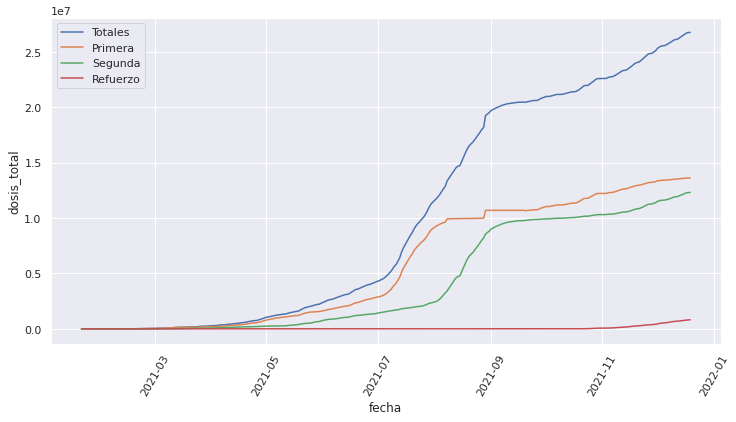

In [10]:
plt.figure(figsize=[12, 6])
sns.lineplot(data=vaccines, x='fecha', y='dosis_total',  label='Totales')
sns.lineplot(data=vaccines, x='fecha', y='primera_dosis', label='Primera')
sns.lineplot(data=vaccines, x='fecha', y='segunda_dosis', label='Segunda')
sns.lineplot(data=vaccines, x='fecha', y='refuerzo', label='Refuerzo')
plt.xticks(rotation=60)
plt.show()

## Deaths

### Visión general

In [11]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         701 non-null    datetime64[ns]
 1   accumulated  701 non-null    int64         
 2   new          700 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.6 KB


In [12]:
deaths.describe()

,accumulated,new
count,701.000000,700.000000
mean,15284.189729,48.034286
std,11250.150143,364.071310
min,0.000000,0.000000
25%,5158.000000,1.000000
50%,14146.000000,19.000000
75%,21560.000000,42.000000
max,33624.000000,8786.000000


### Análisis unidimensional

Data sin outliers

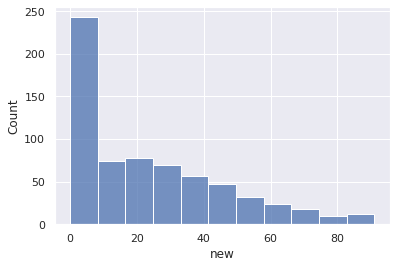

In [13]:
data_d = deaths[deaths['new'] < deaths['new'].quantile(0.95)]['new']
sns.histplot(data=data_d)
plt.show()

### Análisis multidimensional

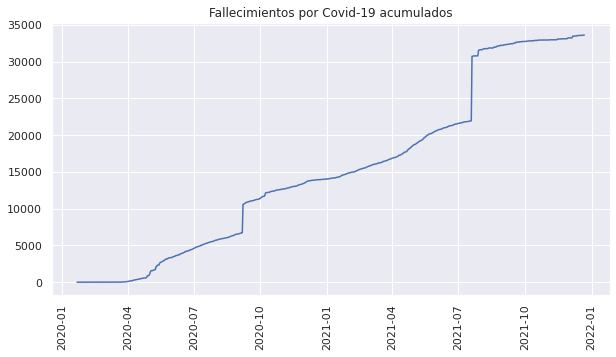

In [14]:
plt.figure(figsize=[10,5])
plt.plot(deaths.date, deaths.accumulated)
plt.title('Fallecimientos por Covid-19 acumulados')
plt.xticks(rotation=90)
plt.show()

Correlaciones entre variables:

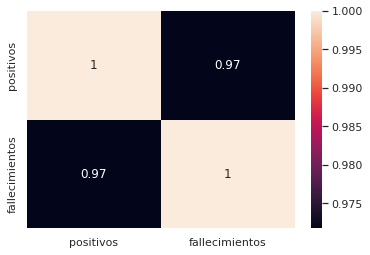

In [15]:
positives_deaths = pd.merge_ordered(positives, deaths, left_on='created_at', right_on='date', how='left', fill_method='ffill')
columns = ['created_at', 'acumulados', 'accumulated']
positives_deaths = positives_deaths[columns].rename(columns={'acumulados': 'positivos', 'accumulated': 'fallecimientos'})
sns.heatmap(positives_deaths.corr(), annot=True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7b048df-fc9b-4970-aa88-df153b270a6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>